We are intersted in the following network metrics:
- clustering degree
- clustering coefficient
- path length: average distance (shortest path) from each node to any other node.
- small-world networks: charactrized by higher clustering coefficient and lower path length than random networks. Small-worldedness can be measured using the following metrics:
    - $\sigma = {{C / C_r} \over {L / L_r}}$, where $r$ refers to a random network. A graph is commonly classified as small-world if $\sigma>1$.
    - $\omega = L_r/L - C/C_l$, where $l$ refers to a lattice network and r refers to a random network. $\omega$ ranges between -1 (lattice) and 1 (random). Values close to 0 means the graph features small-world characteristics.

    - statistical significance of swn

method: simulate C and L with regard to the probability of rewiring from low to high (regular to random). See figure 31.13 in Cohen (2014; p442)

In [1]:
project_dir = '../..'

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

import networkx as nx

Let's first load the connectivity matrix and binarize it with a given threshold ($r$).

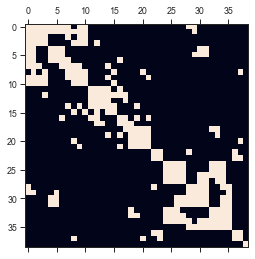

In [31]:
# params
r = 0.2



# data
df = pd.read_csv(f'{project_dir}/outputs/julia2018_mean_resting_connectome.tsv',
                 index_col=0, sep='\t')

# sns.heatmap(df)

labels = df.columns.values.tolist()
conn = df.values
bin_conn = (conn>=r).astype('int')

plt.matshow(bin_conn)
plt.show()

Now, we will calculate small-world property of this undirected graph.

In [74]:
G = nx.from_numpy_matrix(bin_conn)


for g in [G.subgraph(c) for c in nx.connected_components(G) if len(c)>4]:
    g = UG.subgraph(g)
    C = nx.average_clustering(g)
    L = nx.average_shortest_path_length(g)
    sw_sigma = nx.smallworld.sigma(g) # must be > 1
    sw_omega = nx.smallworld.omega(g) # must be close to 0
    print(f'average clustering coefficient (C): {C}')
    print(f'average shortest path length (L): {L}')
    print(f'Small-world Sigma (>1): {sw_sigma}')
    print(f'Small-world Omega (~0): {sw_omega}')

# nx.draw_spring(G, node_size=400)

average clustering coefficient (C): 0.5260556694767222
average shortest path length (L): 2.5732574679943103
Small-world Sigma: 2.6675637527828178
Small-world Omega: -0.0993705636778619
